- 비지도 학습
  - 군집(Clustering) : 비지도 학습의 한 종류, 데이터 포인터를 유사성에 따라 묶어 의미있는 그룹(군집)을 형성
  - K-평균(K-Means)
    - 데이터를 k개의 클러스터 나눈다
    - 각 클러스터의 중심(centroid)와 데이터 포인트 간의 거리(유클리디안 거리등)를 최소화
    - 간단하고 계산 속도가 빠르지만, 클러스터 개수를 사전에 정의해야 합니다
  - DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
    - 데이터 밀도 기반 클러스터링
    - 밀도가 높은 영역은 클러스터로 구분하며, 클러스터의 수를 사전에 지정할 필요가 없다
  - 계층적 군집
    - 데이터를 계층구조로 클러스터링
    - 병합형 과 분할형 방법이 있음
  - Gaussian(정규분포를 생각) Mixture Model(GMM)
    - 데이터가 여러개의 정규 분포를 따른다고 가정하고 클러스터링
    - K-평균과 유사하지만 더 유연한 군집화가 가능하다


# K-Mean 군집화

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 데이터 생성
data,labels = make_blobs(n_samples=300, centers=4, cluster_std=2.5, random_state=42)

<ipython-input-29-a83fd596b237>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],


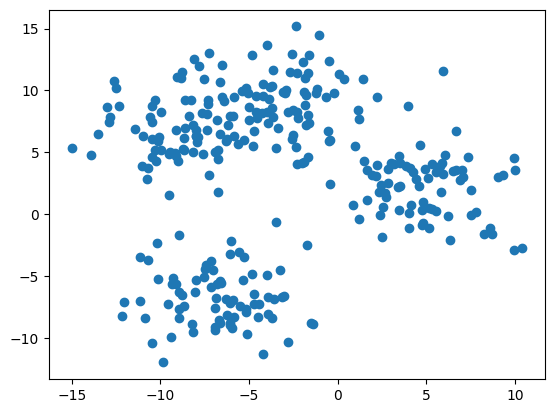

In [29]:
# 학습용 데이터 시각화
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')
plt.show()

In [31]:
# 모델
k_means = KMeans(n_clusters=4)
predict = k_means.fit_predict(data)

In [32]:
k_means.cluster_centers_

array([[-8.85745708,  6.94511083],
       [ 4.94770283,  1.95922932],
       [-6.71804263, -6.67481906],
       [-2.33196662,  9.11755602]])

<ipython-input-33-31eabc6b376a>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],


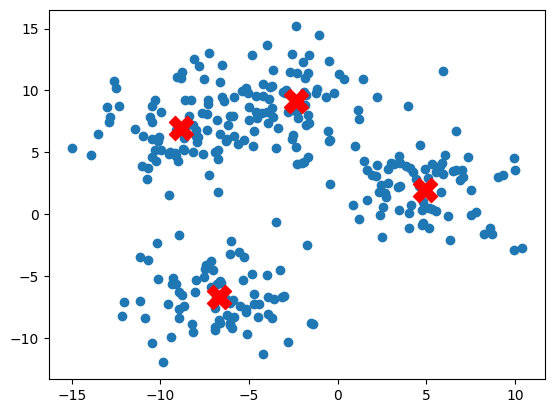

In [33]:
# 군집을 나눈 결과를 시각화
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')  # 원본데이터의 모습
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,
            c='red',
            marker='X')  # 군집의 중심
plt.show()

# 최적의 k개 찾기
  - SSE(Sum of Squared Errors) : 각 데이터 포인트와 해당 클러서 중심점 사이의 거리의 제곱합
  - 작을수록 성능이 좋다
  - k개를 작은수부터 증가하면서 SSE 값을 보면 급격하게 변화는 지점(팔꿈치모양-엘보우)

In [34]:
k_means.inertia_

3276.294246334409

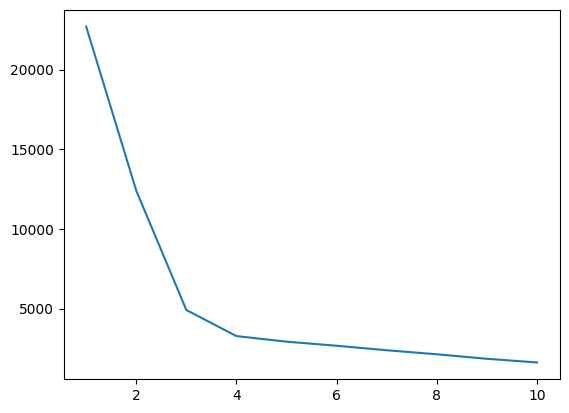

In [35]:
# k 1 ~ 10 까지 증가시면서 k_means.inertia_을 리스트에 저장하고 시각화 - 엘보우 찾기
sse = []
for k in range(1,11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    sse.append(k_means.inertia_)
plt.plot(range(1,11), sse)
plt.show()

<ipython-input-37-d98407eb3ba8>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],
<ipython-input-37-d98407eb3ba8>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:,0], data[:,1],


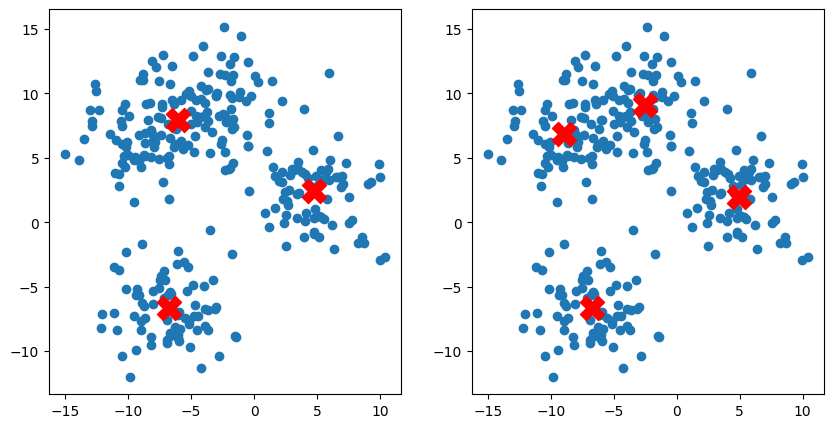

In [37]:
# 최적의 k 개수는 3 또는 4가 된다
k_means_3 = KMeans(n_clusters=3)
k_means_3.fit_predict(data)
k_means_4 = KMeans(n_clusters=4)
k_means_4.fit_predict(data)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')  # 원본데이터의 모습
plt.scatter(k_means_3.cluster_centers_[:,0],k_means_3.cluster_centers_[:,1],s=300,
            c='red',
            marker='X')  # 군집의 중심

plt.subplot(1,2,2)
plt.scatter(data[:,0], data[:,1],
            # c=labels,
            cmap='viridis')  # 원본데이터의 모습
plt.scatter(k_means_4.cluster_centers_[:,0],k_means_4.cluster_centers_[:,1],s=300,
            c='red',
            marker='X')  # 군집의 중심

plt.show()

# 실전 예제
https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv

In [40]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/refs/heads/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
X_numerics = df.loc[: , 'Age': ]
X_numerics

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


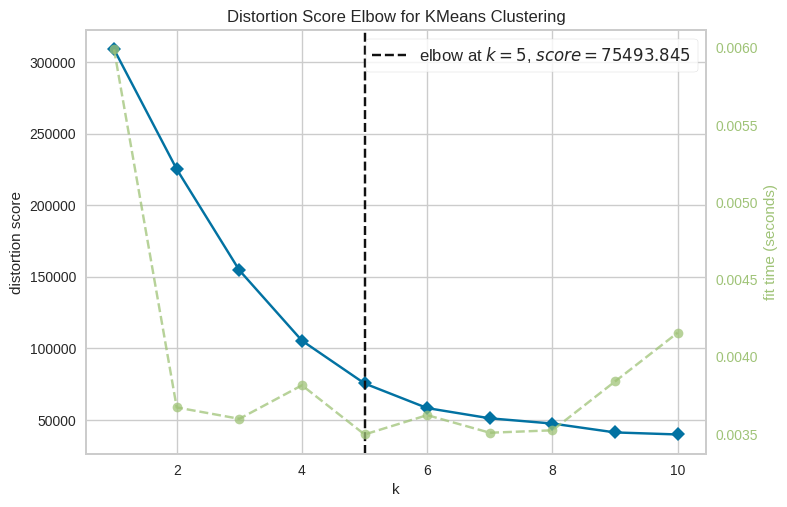

In [47]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

k = 5

In [65]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

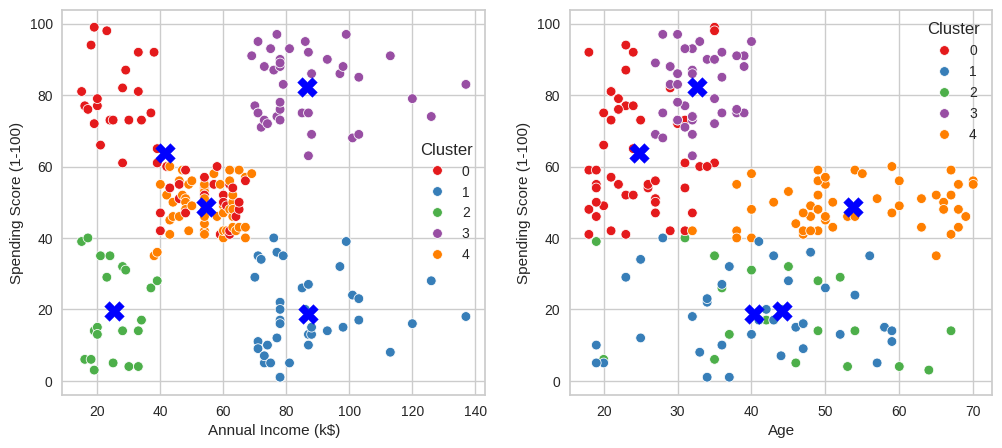

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subplots 생성
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 scatter plot
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

# 두 번째 scatter plot
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# 군집 중심점 추가
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], marker='X', s=200, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2], marker='X', s=200, c="blue")

# 그래프 표시
plt.show()


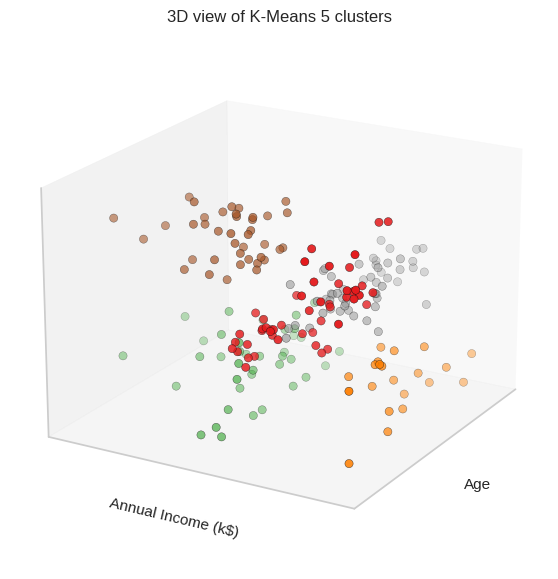

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(KM5_clustered['Age'],
                KM5_clustered['Annual Income (k$)'],
                KM5_clustered['Spending Score (1-100)'],
                c=KM5_clustered['Cluster'],
                s=35, edgecolor='k', cmap=plt.cm.Set1)

# Hide ticks on axes
ax.get_xaxis().set_ticks([])  # Remove x-axis ticks
ax.get_yaxis().set_ticks([])  # Remove y-axis ticks
ax.get_zaxis().set_ticks([])  # Remove z-axis ticks

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')

# Adjust the viewing angle and distance
ax.view_init(elev=20, azim=210)
ax.dist = 12

# Show the plot
plt.show()
